# First Statistical Test, Simulation, and Visualization

(random-experiments:motivating-problem)=
## Motivating Problem: Is This Coin Fair?

You find an odd coin. You assume it is equally likely to come up heads and tails -- we say the coin is *fair*. You would like to conduct a stastical test to determine if it is fair. So, you flip the coin 20 times and count how many times it comes up heads. Since heads and tails are equally likely, you should expect to get somewhere around 10 heads.

*If you only observe 6 heads on the 20 flips, should you reject the idea that the coin is fair?* 

*What if you only observe 4 heads?*


To answer this question, we first need to understand some basics of what a probability is.

The following is a very general definition that should match most people's intuition for the meaning:

````{panels}
DEFINTION
^^^
probability
: a number between 0 and 1 that we assign to an event that is proportional to how likely that event is to occur
````

If a probability of something occuring is very close to 0, then that thing is very unlikely to occur. If the probability is very close to 1, then that thing is very likely to occur.

To determine whether the coin could be fair, we can try to find the probability that a fair coin would produce a result that is as extreme (or more extreme) then what we observed. In other words, if we observe 6 heads, we can determine the probability that a fair coin would produce 6 or fewer heads. If the probability is small, then we can reject the possibility that the coin is fair. How we define "small" is up to the experimenter and anyone who reviews their result. For our work, let's say that we will reject the possibility that the coin is fair if the probability that we would see 6 or fewer heads on 20 flips of a fair coin is less than 0.01 (i.e., 1%).

So, now we just need some way to calculate the required probability for 20 flips of a fair coin. There are two common ways to do this:
1. Analyze the probability mathematically.
2. Estimate the probability experimentally.

We are not ready to explain the mathematical analysis yet, so we will estimate the probability experimentally. So get ready to start flipping coins! 

Not really -- to estimate the probability we are interested in will require flipping a coin 20 times, recording the outcome, and then repeating those steps thousands of times!

Rather than actually flip the coin, we will **simulate** flipping the coin.

### First Computer Simulations

A **computer simulation** is a computer program that models reality and allows us to conduct experiments that:
* would require a lot of time to carry out in real life
* would require a lot of resources to carry out in real life
* would not be possible to repeat in real life (for instance, simulation of the next day's weather or stock market performance)

We will simulate the fair coin experiment using Python. We can simulate a fair coin by random choosing a result from a list that represent heads and tails, where each element in the list is equally likely to be chosen. Let's use the string 'H' to denote heads and the string 'T' to denote tails:

In [2]:
faces=['H','T']

To randomly choose one of the faces, we will utilize the *random* module, which is one of the standard modules included with Python. We will import it in the usual way:

In [3]:
import random

To choose one face at random, we can use the `choice` function. Note that if you are running this instruction, the result shown may be different than what is shown below because it is random **Add footnote about pseudorandom**:

In [4]:
random.choice(faces)

'T'

Now let's simulate the scenario described in [](random-experiments:motivating-problem). We could repeatedly choose random faces using a loop, but the `random` module offers a more efficient way to choose all 20 faces at the same time, using the `choices` function:

In [5]:
coins=random.choices(faces,k=20)
print(coins)

['T', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T']


To count the number of 'H' results in the list, we can use the `count` method of the list object:

In [6]:
coins.count('H')

10

Every time a new set of coin faces is generated, the result will be different. To estimate the probability, we will have to run this statement many times, but running this repeatedly is a pain. Fortunately, the computer can automatically run it for us. In the simulation below, I start introducing some *best practices*:
* The number of times to simulate the experiment is defined at the very top of the simulation as `num_sim`
* Any parameters of the experiment are defined near the top of the simulation. In this simulation, we only need to define the number of times to flip the coin, `flips`

*In the code below, I use the `end` keyword parameter of the `print` function to cause each print statement to output a space at the end instead of a new line. This is only done to make the output more concise.*

In [7]:
num_sims=20
flips=20
for sim in range(num_sims):              # The simulation loop
    coins=random.choices(faces, k=flips) # Simulate all coin flips for one experiment
    print(coins.count('H'), end=' ') 

13 9 7 9 9 9 5 13 11 11 10 12 13 14 10 9 12 8 11 9 

## First Visualizations: Scatter Plots and Histograms

Before we try to answer the question about whether the coin is fair, we take a minute to consider how we visualize the experimental results generated in the simulation. The most straight-forward plot to create from a sequence of numerical data is a *scatter plot*. A (two-dimensional) scatter plot takes two sequences $\mathbf{x}= (x_0, x_1, \ldots)$ and $\mathbf{y}=(y_0, y_1, \ldots)$ and plots the points $(x_0, y_0), (x_1, y_1), \ldots$ in two dimensions. For our purposes, we will plot the observed data versus the experiment number.

Our first step in creating a scatter plot is to store all the data generated during the simulation. A list is a good container for this purpose:

In [8]:
num_sims=100
flips=20

results=[]
for sim in range(num_sims):              # The simulation loop
    coins=random.choices(faces, k=flips) # Simulate all coin flips for one experiment
    results+=[coins.count('H')]          # Add the number of 'H's in this experiment to our results list

There are many different libraries for generating plots in Python. The most common and popular is `matplotlib`, which is based on MATLAB's plotting commands. We usually import the `pyplot` module from `matplotlib` to the `plt` namespace:

In [9]:
import matplotlib.pyplot as plt

You may also want to use a Jupyter magic to make sure plots show up inline with your code and writing in your Jupyter notebook. We will typically use `%matplotlib inline`, but an alternative is `%matplotlib notebook`, which will make plots interactive.

In [11]:
%matplotlib inline

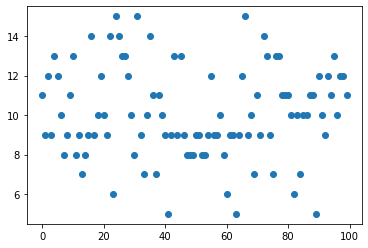

In [14]:
plt.scatter(range(num_sims), results)

It is helpful to label the axes and provide a title for future reference:

Text(0.5, 1.0, 'Experimental Numbers of Heads Observed when a Coin is Flipped 20 Times')

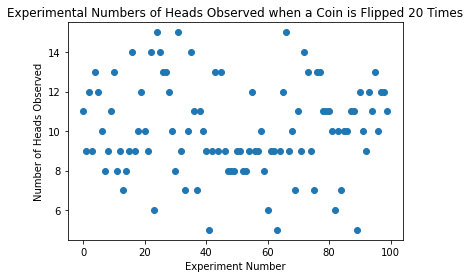

In [16]:
plt.scatter(range(num_sims), results)
plt.xlabel("Experiment Number")
plt.ylabel("Number of Heads Observed")
plt.title("Experimental Numbers of Heads Observed when a Coin is Flipped 20 Times")

It should be clear that most of the results are around 8-12.  It might be easier to visualize this if we plot the number of experiments in which value for the number of heads is observed. We can understand how to create this from a physical perspective: Imagine if we took the graph above and rotated it $90^\circ$ to the left and that the circular markers were turned into balls that were allowed to drop down until they fell onto the axis or another ball. Let's build exactly this type of visualization one ball at a time:

Now let's focus on finding how often 6 or fewer heads occurs. Let's print information about those extreme results. To do this, we will use and `if` statement inside our simulation loop to check if the number of heads observed is less than or equal to 6 and call a `print` statement if that condition is satisfied. 

In [67]:
num_sims=100
flips=20

threshold=6 # best practice is to put any thresholds outside the simulation loop

for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads<=threshold:
        print(sim,': ',num_heads,'Heads')

33 :  6 Heads
44 :  6 Heads
51 :  5 Heads
59 :  5 Heads


We are going to be using variations on this basic function with different parameters later. Whenever you anticipate doing this, it is a good idea to turn the code block into a function. This is very easy in Jupyter:
1. Copy the last version of the simulation and paste it into a new code cell
2. Selecting the entire code block in the new Input cell, using the mouse or Command-A (Mac) or Control-A (Windows/Linux)
3. Indent the selected block by pressing Command-] (Mac) or Control-] (Windows/Linux)
4. Click at the very left edge of the first line of the cell and type `def coinsim_print():` and press Enter
5. Now finish populating the function by cutting the parameters from the code block and pasting them into the function signature as parameters with default values. Put the parameters in the order shown
6. Finally, add a docstring that explains what the function does

In [83]:
def coinsim_print(num_sims=100, threshold=6, flips=20):
    '''
    Simulate multiple experiments, where each experiment involves flipping a coin
    a specified number of times and printing the results of the experiment if the
    number of heads observed is <= a threshold
    
    Inputs:
    threshold: will print if the number of heads observed is <= this value
    num_sims: the total number of experiments to simulate
    flips: the number of coin flips in one experiment
    '''
    
    for sim in range(num_sims):
        coins=random.choices(faces,k=flips)
        num_heads=coins.count('H')
        if num_heads<=threshold:
            print(sim,': ',num_heads,'Heads')

In [71]:
coinsim_print()

6 :  6 Heads
20 :  6 Heads
36 :  6 Heads
37 :  4 Heads
39 :  6 Heads
49 :  6 Heads
70 :  3 Heads
73 :  5 Heads


We really don't care about the particular experiment on which those extreme results occur. Instead, our goal is to estimate the probability of seeing a result that satisfies our threshold condition, and this probabilty can be estimated using the relative frequency of those results:

````{panels}
DEFINITION
^^^
relative frequency
:  the proportion of times that we observe a result matching our criteria during repeated experiments (including simulation); i.e., the number of times that an event occurs divided by the number of times the experiment is conducted. 
````


Let's create a new function that calculates the relative frequency of getting 6 or fewer heads on 20 flips of a fair coin. The primary changes are to:
1. Add an "event counter" to count how many times we see an experimental result that matches our criterion
2. Instead of printing information about the experiments that meet the criterion, increment the event counter
3. After the simulation loop is completed, calculate and print the relative frequency

```{warning}
Note that we give the new function a different name. It is possible to reuse the same function name, but this will produce ambiguities in Jupyter. When you call the function, the function definition that is used is the last one to be run. You can go back and rerun cells in Jupyter, which can then result in you not knowing which version of a function you are running. 

**Best practice:** Do not reuse function names unless you are completely deleting the previous function definition.
```

In [63]:
num_sims=1000
flips=20

threshold=6

event_count=0    # count how many experiments satisfy the given criteria
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads<=threshold:
        event_count+=1
    
print("Relative frequency of", threshold,"or fewer heads is",event_count/num_sims)

Relative frequency of 6 or fewer heads is 0.057715


In [90]:
def coinsim(num_sims=1000, threshold=6, flips=20):
    '''
    Simulate multiple experiments, where each experiment involves flipping a coin
    a specified number of times and printing the results of the experiment if the
    number of heads observed is <= a threshold
    
    Inputs:
    threshold: will print if the number of heads observed is <= this value
    num_sims: the total number of experiments to simulate
    flips: the number of coin flips in one experiment
    '''
    
    event_count=0    # count how many experiments satisfy the given criteria
    for sim in range(num_sims):
        coins=random.choices(faces,k=flips)
        num_heads=coins.count('H')
        if num_heads<=threshold:
            event_count+=1

    print("Relative frequency of", threshold,"or fewer heads is",event_count/num_sims)       

In [93]:
coinsim()

Relative frequency of 6 or fewer heads is 0.061


Note that the relative frequency can change when the simulation is rerun. How much it changes depends on the experiment, the criterion that defines the result we are looking for, and the number of experiments simulated. To provide an accurate estimate of the probability, the number of experiments simulated should be sufficiently large that the relative frequency does not change significantly when the simulation is re-run. (For this experiment with a threshold of 6 heads, one million simulation experiments is sufficient.)

In [94]:
coinsim(1_000_000)

Relative frequency of 6 or fewer heads is 0.058028


**So could the 6 heads be reasonable with a fair coin?** 

With 1,000,000 experiments in the simulation, the relative frequency is approximately 0.058. That means that with a fair coin, we will see 6 or fewer heads about 6% of the time. Since we previously decided to use a criteria that the probabilty must be less than 0.01, we cannot reject the possibility that the coin is fair.

**If we got 4 heads, could that be reasonable with a fair coin?**

In [95]:
coinsim(1_000_000, threshold=4)

Relative frequency of 4 or fewer heads is 0.005843


In this case, the estimate of the probability is about $6 \times 10^{-3}$, which falls below the 0.01 threshold we selected. So, we would reject the possibility that the coin is fair. 

We would believe that the coin is biased towards heads but at this point have no estimate of the size of that bias.

### Summary of Basic Simulation to Estimate a Probability 


Let's use $R$ to denote some result for which we are trying to estimate the probability via computer simulation. Then the basic simulation structure is as follows:
1. Initialize two counters to zero:
    * an event counter, $N_R=0$, and 
    * a loop counter, $i=0$; in Python, the loop counter can be implicitly initialized and tracked using a `for ... in range()` statement
    
1. simulate the outcome of the experiment
1. if $R$ occurred, increment the event counter: $N_R=N_R+1$
1. increment the loop counter: $i=i+1$
1. If $i$ matches the target number of iterations, then calculate and print the relative frequency; otherwise go to step 2.

**We will be using variations on this basic computer simulation structure throughout this course!**

## An Aside: Accelerating Simulations using NumPy

The simulation above is a perfectly valid way to roll a die and tabulate the counts of each outcome. However, we are going to demonstrate that it is also relatively slow, in the sense that the same simulation can be implemented much faster. We begin by determining the execution time of the current simulation (excluding the counting and printing). 

To do this, let's make the actualy die roll simulation into a function:

In [193]:
def diesim1(num_sims=1_000_000):
    rolls=[]
    for sim in range(num_sims):
        die=random.choice(range(1, 7))
        rolls+=[die]

In [196]:
%timeit diesim1()

1.07 s ± 41.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


When I wrote this, my computer took an average of about 1.05 to 1.1 seconds to roll the dice one million times. This is certainly fast enough for the simple cases like this, but as we build more complex simulations, the time to get accurate results will greatly increase.

A general rule of thumb is that `for` loops make simulations slower. It is much better to call a function that can return all the simulated values at once:

In [197]:
def dieroll2(num_sims=1_000_000):
    rolls=random.choices(range(1,7), k=num_sims)

In [198]:
%timeit dieroll2()

241 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


By eliminating the `for` loop, we have reduced the execution time to 1/4 of what it was previously. Another source of inefficiency for this simulation is `random.choices()`. Because `random.choices()` must be able to handle general lists of items, it will not be as fast as if we choose a method that is tuned for providing a list of integers. 

NumPy is the Numerical Python library, and it provides a broad range of functions for working with numbers. The `numpy.random` module contains those functions that generate different types of random numbers. Because we use numpy.random a lot, we will use npr for the namespace of its functions:

In [207]:
import numpy as np
import numpy.random as npr

In [208]:
def dieroll3(num_sims=1_000_000):
    rolls=npr.randint(1, 7, size=num_sims)

In [210]:
%timeit dieroll3()

10.5 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The new version runs over 20 times faster than the previous and is around 100 times faster than the original version of the simulation. 

NumPy also provides efficient ways to do the counting of the results, as shown below:

In [217]:
def dieroll4(num_sims=1_000_000):
    rolls = npr.randint(1, 7, size=num_sims)
    vals, counts = np.unique(rolls, return_counts=True)
    for i, val in enumerate(vals):
        print(val, ":", counts[i])

In [219]:
dieroll4()

1 : 166559
2 : 166615
3 : 166778
4 : 166637
5 : 167129
6 : 166282


Let's try that for our experiment where we flip a coin 20 times:

In [105]:
num_sims=1000000
flips=20
counts=[]
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    counts+=[num_heads]
    
vals,counts=np.unique(counts,return_counts=True)
for i in range(len(vals)):
    print(vals[i],counts[i]/num_sims)

0 2e-06
1 1.7e-05
2 0.000167
3 0.001085
4 0.004523
5 0.014491
6 0.037441
7 0.073512
8 0.120138
9 0.160694
10 0.176116
11 0.160717
12 0.120483
13 0.07331
14 0.036751
15 0.014698
16 0.004595
17 0.001062
18 0.000178
19 1.9e-05
20 1e-06


This is an example of **binary hypothesis testing**. In this case, we set up two hypothesis:

$H_0$: (the *null hypothesis*) is that the observed effect is just caused by randomness in the sampling. It is not real in the underlying system or data. For this exampe, our null hypothesis is that the coin is actually fair

$H_1$: (the *alternative hypothesis*) is that the observed effect is not just caused by random sampling. In this example, the coin is biased toward Tails.

In classical statistics/hypothesis testing, we say that an effect is statistically significant if the probability of observing an effect of that size under the null hypothesis is smaller than some small value $p$. Typical values of $p$ are 0.05 or 0.01, but many argue for even smaller values now. **The threshold to determine statistical significance must always be determined before the experiment is conducted -- otherwise, there is too much temptation to adjust the threshold based on the observed $p$-value.**

In classical hypothesis testing, we do *not* test the alternative hypothesis directly, nor can we utilize side information that we may already have about the two hypotheses

In [173]:
?np.unique

Signature:
np.unique(
    ar,
    return_index=False,
    return_inverse=False,
    return_counts=False,
    axis=None,
)
Docstring:
Find the unique elements of an array.

Returns the sorted unique elements of an array. There are three optional
outputs in addition to the unique elements:

* the indices of the input array that give the unique values
* the indices of the unique array that reconstruct the input array
* the number of times each unique value comes up in the input array

Parameters
----------
ar : array_like
    Input array. Unless `axis` is specified, this will be flattened if it
    is not already 1-D.
return_index : bool, optional
    If True, also return the indices of `ar` (along the specified axis,
    if provided, or in the flattened array) that result in the unique array.
return_inverse : bool, optional
    If True, also return the indices of the unique array (for the specified
    axis, if provided) that can be used to reconstruct `ar`.
return_counts : bool, optiona